In [1]:
%matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Cargamos el template
template = cv.imread('assets\\template\\pattern.png', 0)

In [3]:
# Cargamos las imagenes
base_path = 'assets\images'
image_names = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']

images = [cv.imread(f"{base_path}\{path}") for path in image_names]
images_rgb = [cv.cvtColor(image, cv.COLOR_BGR2RGB) for image in images]
images_gray = [cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in images]

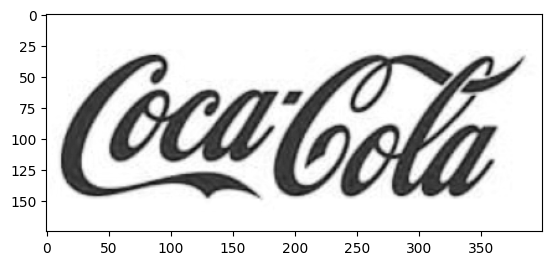

In [4]:
# Visualizo el template
%matplotlib inline
plt.figure()
plt.imshow(template, cmap='gray')

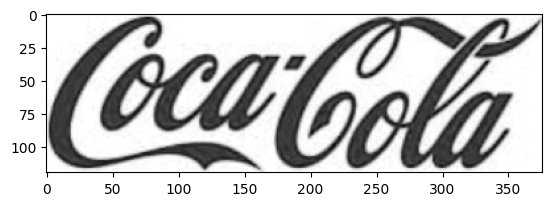

In [5]:
%matplotlib inline
# Recorto template para tener un mejor match
x1, y1 = 10, 30  # Coordenadas de la esquina superior izquierda
x2, y2 = 386, 150  # Coordenadas de la esquina inferior derecha
trimmed_template = template[y1:y2, x1:x2]
plt.imshow(trimmed_template, cmap='gray')

Visualizamos el template con la primer imagen para ver las dimensiones de cada uno. No se puede hacer template matching si el template no quepa en la imagen.

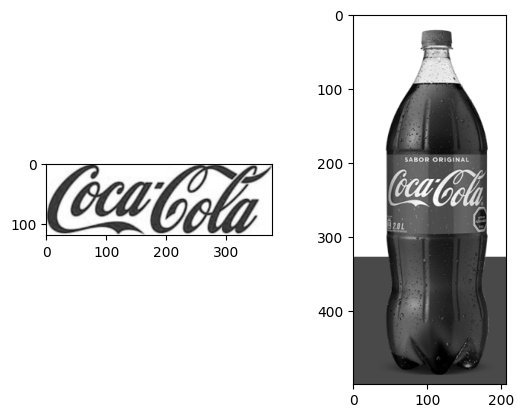

In [8]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(trimmed_template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images_gray[0], cmap='gray')

In [10]:
def resizeTemplateToFitImage(image: np.ndarray, template: np.ndarray) -> np.ndarray:
    # Obtener shapes de la imagen y el template
    h_img, w_img = image.shape[:2]
    h_template, w_template = template.shape[:2]
    
    # Comprobar si el template es más grande que la imagen
    if h_template > h_img or w_template > w_img:
        # Calcular los factores de escala para ajustar el template a la imagen
        scale_factor = min(h_img / h_template, w_img / w_template)
        new_w = int(w_template * scale_factor)
        new_h = int(h_template * scale_factor)
        
        # Redimensionar el template manteniendo la relación de aspecto
        template_resized = cv.resize(template, (new_w, new_h), interpolation=cv.INTER_AREA)
        
        return template_resized
    # Si el template ya cabe en la imagen, devolvemos el template original
    return template

In [11]:
new_template = resizeTemplateToFitImage(images[0], trimmed_template)

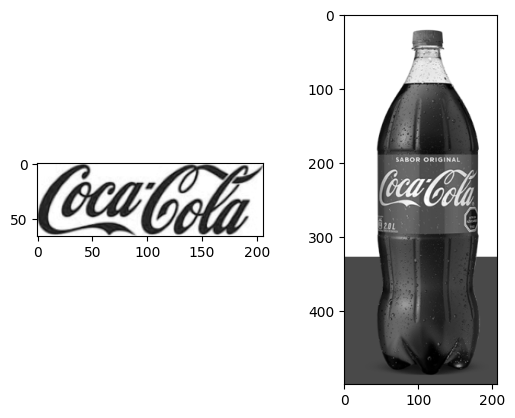

In [12]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(new_template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images_gray[0], cmap='gray')